## regressing a new data set

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('USA_Housing.csv')
df.tail(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


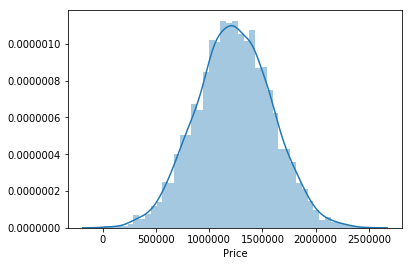

In [25]:
#we'll try to predict price based on these other features
y = df['Price']
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

import seaborn as sns
sns.distplot(df['Price'])

In [26]:
#use a library to split the dataset
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4,random_state=101)

In [28]:
#had to simplify column names to get the smf.ols formula to run
linmoddf = pd.DataFrame(columns=['Price','AvgAreaIncome','AvgAreaHouseAge','AvgAreaNumberofRooms','AvgAreaNumberofBedrooms','AreaPopulation'])

linmoddf['Price'] = y_train
linmoddf['AvgAreaIncome'] = x_train['Avg. Area Income']
linmoddf['AvgAreaHouseAge'] = x_train['Avg. Area House Age']
linmoddf['AvgAreaNumberofRooms'] = x_train['Avg. Area Number of Rooms']
linmoddf['AvgAreaNumberofBedrooms'] = x_train['Avg. Area Number of Bedrooms']
linmoddf['AreaPopulation'] = x_train['Area Population']

In [29]:
linmoddf.head(2)

,Price,AvgAreaIncome,AvgAreaHouseAge,AvgAreaNumberofRooms,AvgAreaNumberofBedrooms,AreaPopulation
1303,1.489648e+06,68091.179676,5.364208,7.502956,3.10,44557.379656
1051,1.183015e+06,75729.765546,5.580599,7.642973,4.21,29996.018448


In [30]:
#use sms.ols library for regression to get easy test statistics
import statsmodels.formula.api as smf

linear_formula = 'Price ~ AvgAreaIncome + AvgAreaHouseAge + AvgAreaNumberofRooms + AvgAreaNumberofBedrooms + AreaPopulation'
linmod = smf.ols(formula=linear_formula, data=linmoddf).fit()
predict = linmod.predict(linmoddf)

In [31]:
linmod.rsquared

0.9181223200568411

In [32]:
#Rsquared good

In [33]:
linmod.pvalues

Intercept                  0.000000
AvgAreaIncome              0.000000
AvgAreaHouseAge            0.000000
AvgAreaNumberofRooms       0.000000
AvgAreaNumberofBedrooms    0.184523
AreaPopulation             0.000000
dtype: float64

In [34]:
#obviously this is a toy data set. Number of Bedroms can be dropped
#let's check performance on test data first

## checking performance on test data

In [35]:
testdf = pd.DataFrame(columns=['Price','AvgAreaIncome','AvgAreaHouseAge','AvgAreaNumberofRooms','AvgAreaNumberofBedrooms','AreaPopulation'])

testdf['Price'] = y_test
testdf['AvgAreaIncome'] = x_test['Avg. Area Income']
testdf['AvgAreaHouseAge'] = x_test['Avg. Area House Age']
testdf['AvgAreaNumberofRooms'] = x_test['Avg. Area Number of Rooms']
testdf['AvgAreaNumberofBedrooms'] = x_test['Avg. Area Number of Bedrooms']
testdf['AreaPopulation'] = x_test['Area Population']

In [36]:
predict = linmod.predict(testdf)

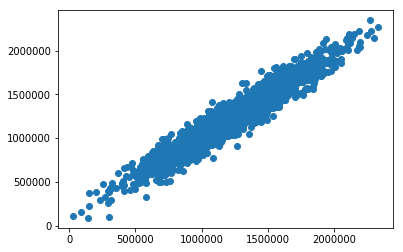

In [37]:
plt.scatter(y_test,predict)

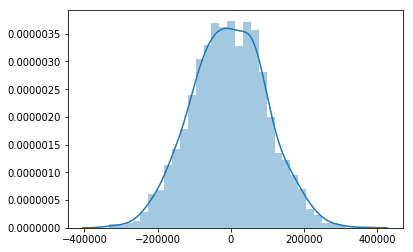

In [40]:
#looks good
sns.distplot(y_test - predict)

In [42]:
#new library for evaluation metrics
from sklearn import metrics

metrics.mean_squared_error(y_test,predict)

10460958907.209688

In [43]:
#how to think about if this is good or bad?

In [108]:
import pandas as pd
import numpy as np
import sklearn

from statsmodels.sandbox.regression.predstd import wls_prediction_std

## dimensionality reduction / PLS

In [49]:
#let's try a PLS regression. we know 5 features should perform well
from sklearn.cross_decomposition import PLSRegression

pls1 = PLSRegression(n_components=5)
pls1.fit(x_test, y_test)
Y_PLS_pred = pls1.predict(x_test)
print('R-squared PLSR:', pls1.score(x_test, y_test), ' Prior R-squared:',linmod.rsquared)

R-squared PLSR: 0.9180955063953449  Prior R-squared: 0.9181223200568411


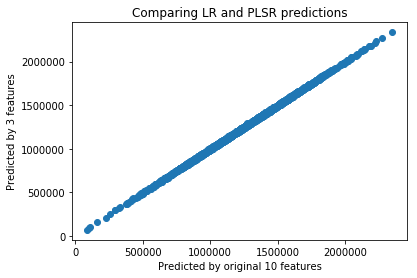

In [50]:
# Rsquared virtually unchanged. visual comparison
plt.scatter(predict,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.9180786551615857


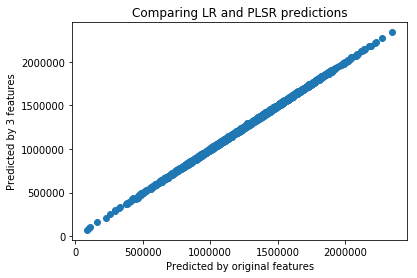

In [57]:
#let's try a PLS regression with 3 components
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=3)
pls2.fit(x_test, y_test)
Y_PLS_pred2 = pls2.predict(x_test)
print('R-squared PLSR:', pls2.score(x_test, y_test))

# Compare the predictions of the two models
plt.scatter(predict,Y_PLS_pred2) 
plt.xlabel('Predicted by original features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

R-squared PLSR: 0.9150502366047417


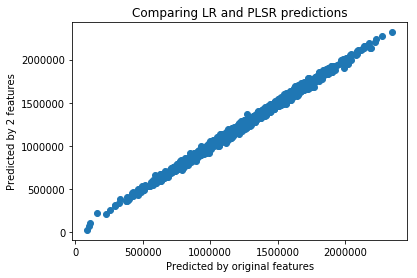

In [58]:
#let's try a PLS regression with 2 components
from sklearn.cross_decomposition import PLSRegression

pls3 = PLSRegression(n_components=2)
pls3.fit(x_test, y_test)
Y_PLS_pred2 = pls3.predict(x_test)
print('R-squared PLSR:', pls3.score(x_test, y_test))

# Compare the predictions of the two models
plt.scatter(predict,Y_PLS_pred2) 
plt.xlabel('Predicted by original features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [56]:
#still seems really good

R-squared PLSR: 0.9150502366047417


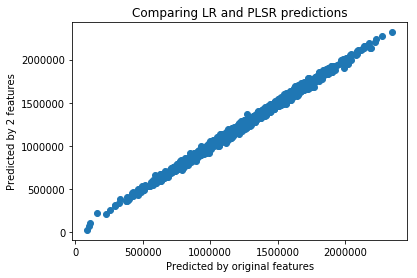

In [59]:
#let's try a PLS regression with 1 components
from sklearn.cross_decomposition import PLSRegression

pls4 = PLSRegression(n_components=2)
pls4.fit(x_test, y_test)
Y_PLS_pred2 = pls4.predict(x_test)
print('R-squared PLSR:', pls4.score(x_test, y_test))

# Compare the predictions of the two models
plt.scatter(predict,Y_PLS_pred2) 
plt.xlabel('Predicted by original features')
plt.ylabel('Predicted by 2 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [63]:
pls4

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)